In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['figure.figsize'] = (13.0,5.0)
import torch

Train Dataset

Text(0.5, 1.0, '$y = sin(x)$')

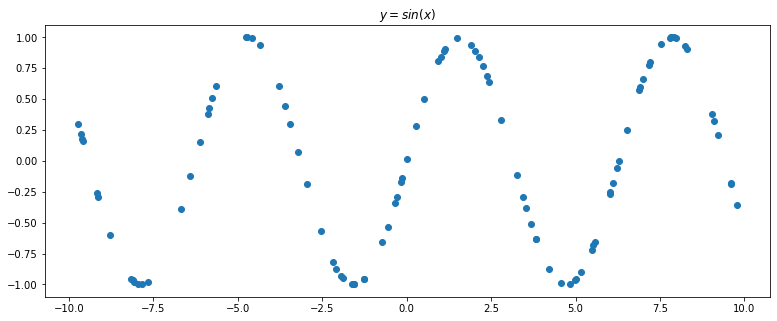

In [2]:
x_train = torch.rand(100)
x_train = x_train * 20 - 10.0

y_train = torch.sin(x_train)

plt.plot(x_train.numpy(), y_train.numpy(),'o')
plt.title('$y = sin(x)$')

Text(0.5, 1.0, 'Gaussian noise')

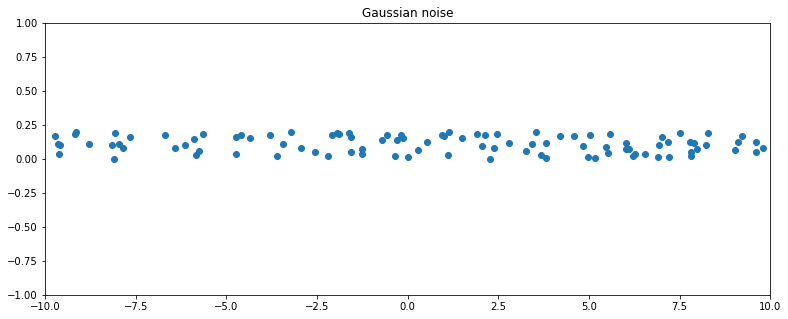

In [3]:
noise = torch.rand(y_train.shape)/5

plt.plot(x_train.numpy(), noise.numpy(), 'o')
plt.axis([-10,10,-1,1])
plt.title('Gaussian noise')

Text(0, 0.5, 'y_train')

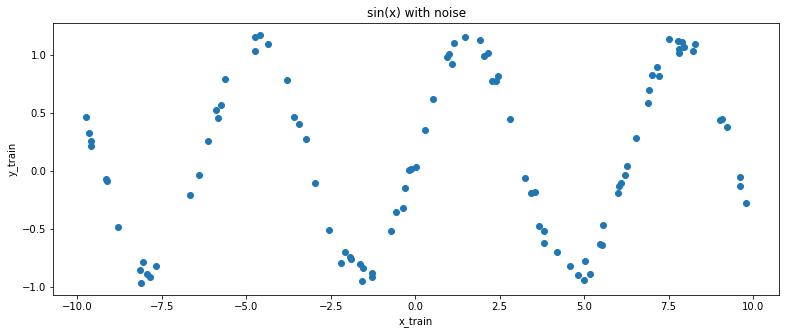

In [4]:
y_train = y_train + noise
plt.plot(x_train.numpy(), y_train.numpy(), 'o')
plt.title('sin(x) with noise')
plt.xlabel('x_train')
plt.ylabel('y_train')

In [5]:
x_train.unsqueeze_(1)
y_train.unsqueeze_(1)

tensor([[-0.9520],
        [ 1.1284],
        [ 0.0372],
        [-0.1096],
        [ 0.2841],
        [ 0.9898],
        [ 0.7896],
        [ 1.1222],
        [-0.8944],
        [ 0.0079],
        [-0.8231],
        [-0.8381],
        [-0.8254],
        [-0.1092],
        [ 0.5263],
        [-0.0386],
        [-0.3182],
        [-0.5127],
        [-0.0586],
        [ 0.4476],
        [ 1.0200],
        [-0.6977],
        [-0.6363],
        [ 0.8193],
        [-0.0734],
        [ 0.2549],
        [ 0.9216],
        [-0.4899],
        [-0.8085],
        [ 0.5834],
        [-0.1897],
        [ 0.3492],
        [ 0.6204],
        [-0.1346],
        [ 0.8995],
        [ 1.0198],
        [-0.5166],
        [ 0.4668],
        [ 0.7715],
        [-0.1494],
        [-0.8845],
        [ 1.1522],
        [ 1.1580],
        [-0.1915],
        [ 0.8242],
        [ 1.1057],
        [-0.8995],
        [-0.4711],
        [ 1.1689],
        [-0.6372],
        [-0.1849],
        [-0.7973],
        [ 1.

Validation Dataset

Text(0, 0.5, 'y_val')

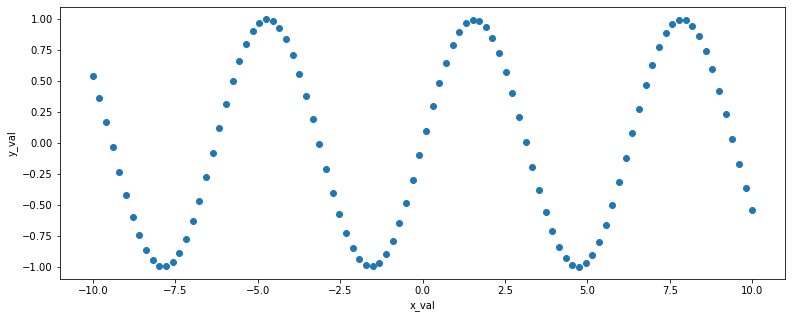

In [6]:
x_validation = torch.linspace(-10,10,100)
y_validation = torch.sin(x_validation.data)
plt.plot(x_validation.numpy(), y_validation.numpy(), 'o')
plt.xlabel('x_val')
plt.ylabel('y_val')

In [7]:
x_validation.unsqueeze_(1)
y_validation.unsqueeze_(1);

Model Construction

In [8]:
class SineNet(torch.nn.Module):
    def __init__(self, n_hidden_neurons):
        super(SineNet, self).__init__()
        self.fc1 = torch.nn.Linear(1, n_hidden_neurons)
        self.act1 = torch.nn.Sigmoid()
        self.fc2 = torch.nn.Linear(n_hidden_neurons,1)

    def forward(self,x):
        x = self.fc1(x)
        x = self.act1(x)
        x= self.fc2(x)
        return x

sine_net = SineNet(50)

Prediction

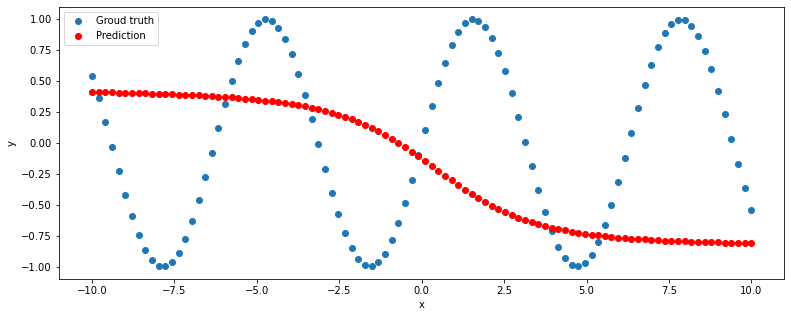

In [10]:
def predict(net, x, y):
    y_pred = net.forward(x)

    plt.plot(x.numpy(), y.numpy(), 'o', label = 'Groud truth')
    plt.plot(x.numpy(), y_pred.detach().numpy(), 'o', c='r', label = 'Prediction')
    plt.legend(loc = 'upper left')
    plt.xlabel('x')
    plt.ylabel('y')

predict(sine_net, x_validation, y_validation)

Optimizer

In [11]:
optimizer = torch.optim.Adam(sine_net.parameters(), lr = 0.01)

Loss Function

In [14]:
def loss(pred, target):
    squares = (pred - target) ** 2
    return squares.mean()

Training Procedure

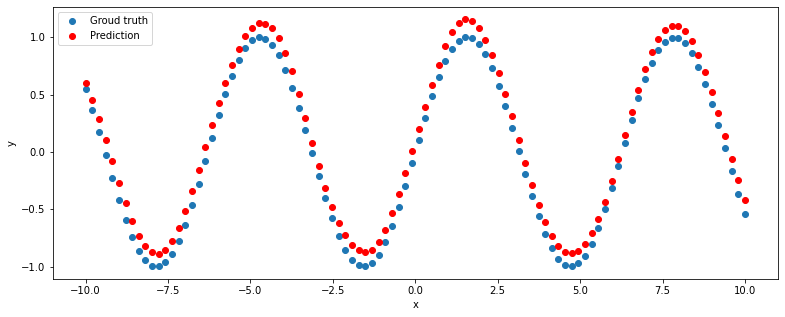

In [15]:
for epoch in range(2000):
    optimizer.zero_grad()

    y_pred = sine_net.forward(x_train)
    loss_val = loss(y_pred, y_train)

    loss_val.backward()

    optimizer.step()

predict(sine_net, x_validation, y_validation)